<img width=700px; src="../img/logoUPSayPlusCDS_990.png">

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [188]:
df = pd.read_csv("data/titanic.csv")

In [189]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

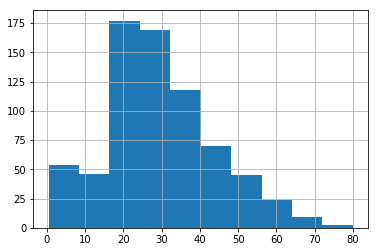

In [4]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [5]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

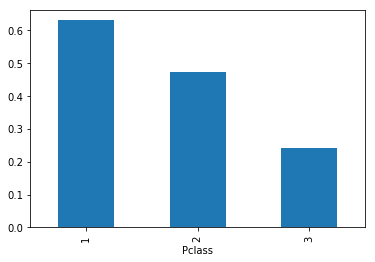

In [6]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.

#### Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [177]:
data = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [121]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

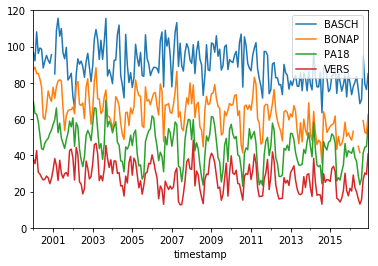

In [122]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

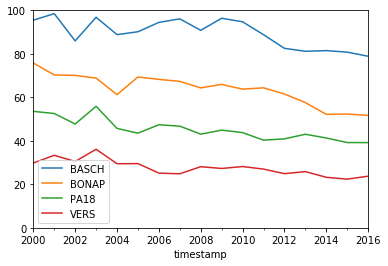

In [123]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

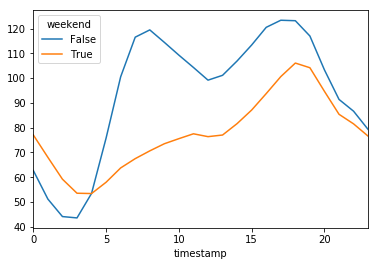

In [178]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# 2. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="../img/schema-dataframe.svg">

In [125]:
df

,index,Fare,Survived,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked
Age,,,,,,,,,,,
22.0,0,7.2500,0,1,3,male,1,0,A/5 21171,NaN,S
38.0,1,71.2833,1,2,1,female,1,0,PC 17599,C85,C
26.0,2,7.9250,1,3,3,female,0,0,STON/O2. 3101282,NaN,S
35.0,3,53.1000,1,4,1,female,1,0,113803,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
19.0,887,30.0000,1,888,1,female,0,0,112053,B42,S
NaN,888,23.4500,0,889,3,female,1,2,W./C. 6607,NaN,S
26.0,889,30.0000,1,890,1,male,0,0,111369,C148,C
32.0,890,7.7500,0,891,3,male,0,0,370376,NaN,Q


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [179]:
df.index


RangeIndex(start=0, stop=891, step=1)

In [180]:
df.columns

Index(['Age', 'index', 'Fare', 'Survived', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [181]:
df.dtypes

Age         float64
index         int64
Fare        float64
Survived      int64
             ...   
Parch         int64
Ticket       object
Cabin        object
Embarked     object
Length: 12, dtype: object

An overview of that information can be given with the `info()` method:

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 891 entries, 22.0 to 32.0
Data columns (total 11 columns):
index          891 non-null int64
Fare           891 non-null float64
Survived       891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 83.5+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [132]:
df.values

array([[0, 7.25, 0, ..., 'A/5 21171', nan, 'S'],
       [1, 71.2833, 1, ..., 'PC 17599', 'C85', 'C'],
       [2, 7.925, 1, ..., 'STON/O2. 3101282', nan, 'S'],
       ..., 
       [888, 23.45, 0, ..., 'W./C. 6607', nan, 'S'],
       [889, 30.0, 1, ..., '111369', 'C148', 'C'],
       [890, 7.75, 0, ..., '370376', nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [182]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [160]:
df_age = pd.DataFrame(data)
df_age = df_age.set_index('population')
df_age

#df_age = df_age.reset_index()
#df_age

,area,capital,country
population,,,
11.3,30510,Brussels,Belgium
64.3,671308,Paris,France
81.3,357050,Berlin,Germany
16.9,41526,Amsterdam,Netherlands
64.9,244820,London,United Kingdom


In [161]:
df_age = df_age.set_index('country')
df_age

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris
Germany,357050,Berlin
Netherlands,41526,Amsterdam
United Kingdom,244820,London


In [162]:
df_age = df_age.set_index('capital')
df_age

,area
capital,
Brussels,30510
Paris,671308
Berlin,357050
Amsterdam,41526
London,244820


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [183]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [106]:
age = df['Age']
age.shape


(891,)

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [163]:
age.index

Float64Index([   7.25, 71.2833,   7.925,    53.1,    8.05,  8.4583, 51.8625,
               21.075, 11.1333, 30.0708,
              ...
               7.8958, 10.5167,    10.5,    7.05,  29.125,    13.0,    30.0,
                23.45,    30.0,    7.75],
             dtype='float64', name='Fare', length=891)

You can access the underlying numpy array representation with the `.values` attribute:

In [164]:
age.values[:10]

array([ 22.,  38.,  26.,  35.,  35.,  nan,  54.,   2.,  27.,  14.])

We can access series values via the index, just like for NumPy arrays:

In [165]:
age[0]

0    36.0
0    40.0
0    25.0
0     NaN
     ... 
0     NaN
0    39.0
0     NaN
0    38.0
Name: Age, Length: 15, dtype: float64

Unlike the NumPy array, though, this index can be something other than integers:

In [184]:
df.columns

Index(['Age', 'index', 'Fare', 'Survived', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [185]:
df.columns

Index(['Age', 'index', 'Fare', 'Survived', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
# df = df.set_index('Age')`
df.columns
df

,Age,index,Fare,Survived,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,22.0,0,7.2500,0,1,3,male,1,0,A/5 21171,NaN,S
1,38.0,1,71.2833,1,2,1,female,1,0,PC 17599,C85,C
2,26.0,2,7.9250,1,3,3,female,0,0,STON/O2. 3101282,NaN,S
3,35.0,3,53.1000,1,4,1,female,1,0,113803,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,19.0,887,30.0000,1,888,1,female,0,0,112053,B42,S
888,NaN,888,23.4500,0,889,3,female,1,2,W./C. 6607,NaN,S
889,26.0,889,30.0000,1,890,1,male,0,0,111369,C148,C
890,32.0,890,7.7500,0,891,3,male,0,0,370376,NaN,Q


In [169]:
df2 = df.reset_index().set_index('Age')

In [213]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [214]:
Name = df.set_index('Name')
Name

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [215]:
Name['PassengerId']

Name
Braund, Mr. Owen Harris                                  1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)      2
Heikkinen, Miss. Laina                                   3
Futrelle, Mrs. Jacques Heath (Lily May Peel)             4
                                                      ... 
Graham, Miss. Margaret Edith                           888
Johnston, Miss. Catherine Helen "Carrie"               889
Behr, Mr. Karl Howell                                  890
Dooley, Mr. Patrick                                    891
Name: PassengerId, Length: 891, dtype: int64

In [204]:
Name.loc['Dooley, Mr. Patrick']

PassengerId       891
Survived            0
Pclass              3
Sex              male
                ...  
Ticket         370376
Fare             7.75
Cabin             NaN
Embarked            Q
Name: Dooley, Mr. Patrick, Length: 11, dtype: object

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [211]:
age * 10
age.index

Float64Index([   7.25, 71.2833,   7.925,    53.1,    8.05,  8.4583, 51.8625,
               21.075, 11.1333, 30.0708,
              ...
               7.8958, 10.5167,    10.5,    7.05,  29.125,    13.0,    30.0,
                23.45,    30.0,    7.75],
             dtype='float64', name='Fare', length=891)

A range of methods:

In [209]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [210]:
age[age > 70]

Fare
34.6542    71.0
7.7500     70.5
49.5042    71.0
30.0000    80.0
7.7750     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [ ]:
df['Embarked'].value_counts()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction31.py

In [ ]:
# %load snippets/02-pandas_introduction32.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction33.py

# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [ ]:
#pd.read

In [ ]:
#df.to

Very powerful csv reader:

In [ ]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [ ]:
df.head()

<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction39.py

In [ ]:
no2

# 4. Exploration

Some useful methods:

`head` and `tail`

In [ ]:
no2.head(3)

In [ ]:
no2.tail()

`info()`

In [ ]:
no2.info()

Getting some basic summary statistics about the data with `describe`:

In [ ]:
no2.describe()

Quickly visualizing the data

In [ ]:
no2.plot(kind='box', ylim=[0,250])

In [ ]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction47.py

The default plot (when not specifying `kind`) is a line plot of all columns:

In [ ]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

In [ ]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> see further in this notebook!

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [ ]:
df = pd.read_csv("data/titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
df['Age']

or multiple columns:

In [ ]:
df[['Age', 'Fare']]

But, slicing accesses the rows:

In [ ]:
df[10:15]

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [216]:
df = df.set_index('Name')

In [217]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.550000000000001

In [218]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [219]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [220]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [221]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [222]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [223]:
df = pd.read_csv("data/titanic.csv")

In [243]:
# %load snippets/02-pandas_introduction64.py
df[df['Sex'] == 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [239]:
# %load snippets/02-pandas_introduction65.py
df.loc[df['Sex'] == 'male', 'Age'].mean()

30.72664459161148

In [244]:
# %load snippets/02-pandas_introduction66.py
df.loc[df['Sex']=='female','Age'].mean()

27.915708812260537

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction67.py
len(df[df['Age'] > 70])

In [ ]:
# %load snippets/02-pandas_introduction68.py
(df['Age'] > 70).sum()

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [260]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [261]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [262]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="../img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [263]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [270]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


In [268]:
df.groupby('key').aggregate(['mean'])  # 'sum'

,data
,mean
key,
A,5
B,10
C,15


And many more methods are available. 

In [265]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [271]:
df = pd.read_csv("data/titanic.csv")

In [272]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
</ul>
</div>

In [281]:
# %load snippets/02-pandas_introduction77.py
grp = df.groupby('Sex')['Age'].mean()
grp.head()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [285]:
# %load snippets/02-pandas_introduction78.py
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

0.3838383838383838

In [283]:
df['Survived'].sum()/len(df)

0.3838383838383838

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction79.py
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

In [289]:
df[df['Age'] <= 25]['Survived'].mean()

0.4119601328903654

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [294]:
# %load snippets/02-pandas_introduction80.py
# df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [303]:
df[df['Sex']=='male']['Survived'].mean() - df[df['Sex'] == 'female']['Survived'].mean()

-0.5531300709799203

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction81.py
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

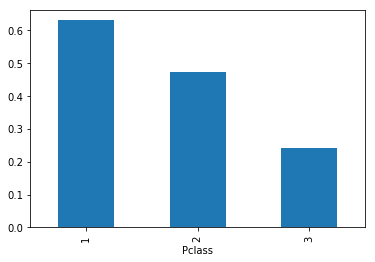

In [313]:
df.groupby('Pclass')['Survived'].mean().plot('bar') # bar, line, hist


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [314]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

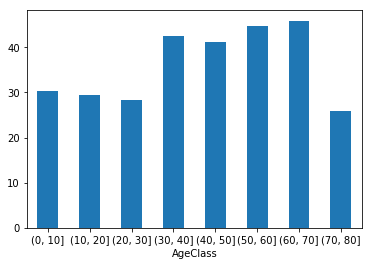

In [322]:
# %load snippets/02-pandas_introduction83.py
df.groupby('AgeClass')['Fare'].mean().plot(kind='bar', rot=0)

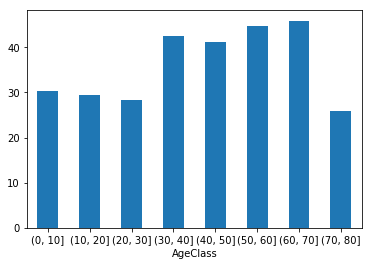

In [323]:
df.groupby('AgeClass')['Fare'].mean().plot(kind = 'bar', rot = 0)

# 7. Working with time series data

In [324]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [325]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

Indexing a time series works with strings:

In [326]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [327]:
no2['2012-01':'2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


Time and date components can be accessed from the index:

In [328]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [329]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

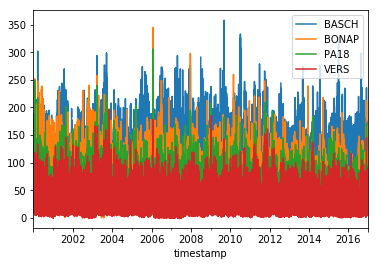

In [332]:
no2.plot()

The time series has a frequency of 1 hour. I want to change this to daily:

In [331]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [ ]:
no2.resample('D').mean().head()

Above I take the mean, but as with `groupby` I can also specify other methods:

In [ ]:
no2.resample('D').max().head()

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

In [ ]:
no2.resample('M').mean().plot() # 'A'

In [ ]:
# no2['2012'].resample('D').plot()

In [ ]:
# %load snippets/02-pandas_introduction96.py

<div class="alert alert-success">

<b>EXERCISE</b>: The evolution of the yearly averages with, and the overall mean of all stations

 <ul>
  <li>Use `resample` and `plot` to plot the yearly averages for the different stations.</li>
  <li>The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction97.py

<div class="alert alert-success">

<b>EXERCISE</b>: how does the *typical monthly profile* look like for the different stations?

 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [ ]:
# %load snippets/02-pandas_introduction98.py

Now, we can calculate the mean of each month over the different years:

In [ ]:
# %load snippets/02-pandas_introduction99.py

In [ ]:
# %load snippets/02-pandas_introduction100.py

<div class="alert alert-success">

<b>EXERCISE</b>: The typical diurnal profile for the different stations

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction101.py

<div class="alert alert-success">

<b>EXERCISE</b>: What is the difference in the typical diurnal profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a days is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>

Add a column indicating the weekday:

In [ ]:
no2.index.weekday?

In [ ]:
# %load snippets/02-pandas_introduction103.py

Add a column indicating week/weekend

In [ ]:
# %load snippets/02-pandas_introduction104.py

Now we can groupby the hour of the day and the weekend (or use `pivot_table`):

In [ ]:
# %load snippets/02-pandas_introduction105.py

In [ ]:
# %load snippets/02-pandas_introduction106.py

In [ ]:
# %load snippets/02-pandas_introduction107.py

In [ ]:
# %load snippets/02-pandas_introduction108.py

<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>

In [ ]:
# %load snippets/02-pandas_introduction109.py

In [ ]:
# %load snippets/02-pandas_introduction110.py

In [ ]:
# %load snippets/02-pandas_introduction111.py

# 9. What I didn't talk about

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html